In [1]:
import tensorflow as tf

/Users/UnnamE/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
sample = mnist.train.images[2].reshape(28,28)

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

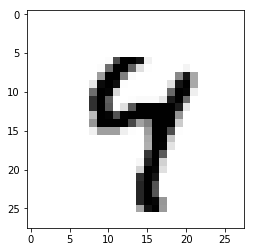

In [9]:
plt.imshow(sample, cmap='Greys')

In [10]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [11]:
n_classes = 10
n_samples = mnist.train.num_examples

In [12]:
n_input = 784

In [13]:
n_hidden_1 = 256
n_hidden_2 = 256

In [14]:
def multilayer_perceptron(x, weights, biases):
    '''
    x: Plcaseholder for Data Input
    weights: Dict of weights
    biases: Dict of bias values
    '''
    
    # First Hidden Layer with RELU Activation
    # X * W + B
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Func(X * W * B) = RELU -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output Layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    
    return out_layer

In [15]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes])),
}

In [16]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes])),
}

In [17]:
x = tf.placeholder('float', [None, n_input])

In [18]:
y = tf.placeholder('float', [None, n_classes])

In [19]:
pred = multilayer_perceptron(x, weights, biases)

In [20]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer =tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [21]:
t = mnist.train.next_batch(1)

In [22]:
Xsamp, ysamp = t

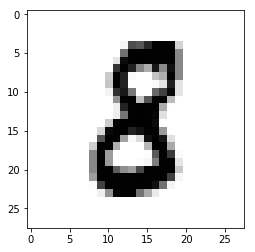

In [23]:
plt.imshow(Xsamp.reshape(28, 28), cmap='Greys')

In [24]:
ysamp

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [25]:
sess = tf.InteractiveSession()

In [26]:
init = tf.global_variables_initializer()

In [27]:
sess.run(init)

In [28]:
for epoch in range(training_epochs):
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x:batch_x, y:batch_y})
        avg_cost += c/total_batch
        
    print(f"Epoch: {epoch+1}, cost: {avg_cost:.4f}")
    
print(f"Model has compoletd {training_epochs} Epochs of training")

Epoch: 1, cost: 172.9754
Epoch: 2, cost: 41.7252
Epoch: 3, cost: 26.3526
Epoch: 4, cost: 18.4547
Epoch: 5, cost: 13.2757
Epoch: 6, cost: 9.8564
Epoch: 7, cost: 7.4107
Epoch: 8, cost: 5.4630
Epoch: 9, cost: 4.0681
Epoch: 10, cost: 2.9605
Epoch: 11, cost: 2.2400
Epoch: 12, cost: 1.7093
Epoch: 13, cost: 1.2707
Epoch: 14, cost: 0.8869
Epoch: 15, cost: 0.7713
Model has compoletd 15 Epochs of training


In [29]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [30]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [31]:
correct_predictions = tf.cast(correct_predictions, 'float')

In [32]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [33]:
accuracy = tf.reduce_mean(correct_predictions)

In [34]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [35]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [36]:
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9468